#Gaussian Process Regression on Large Datasets

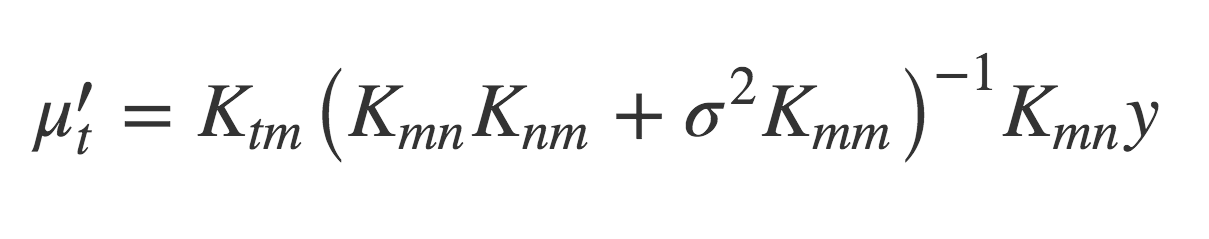

In [1]:
#Subset of Regressors Equation 
from IPython.display import Image
Image(filename='equation1.png')

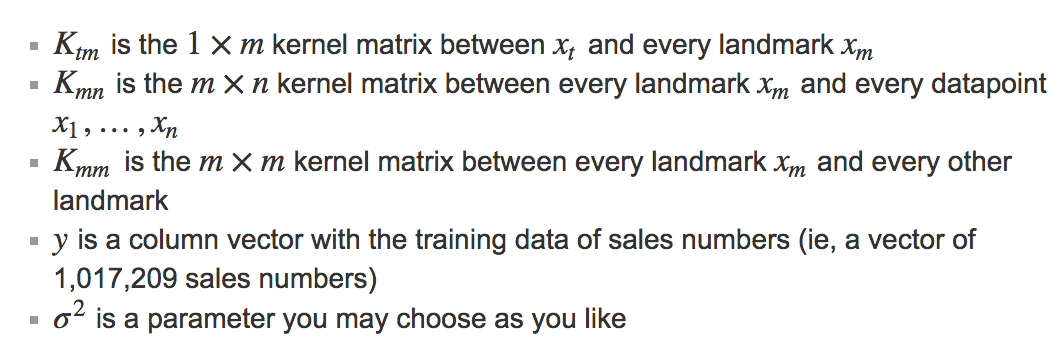

In [2]:
Image(filename='equation2.png')

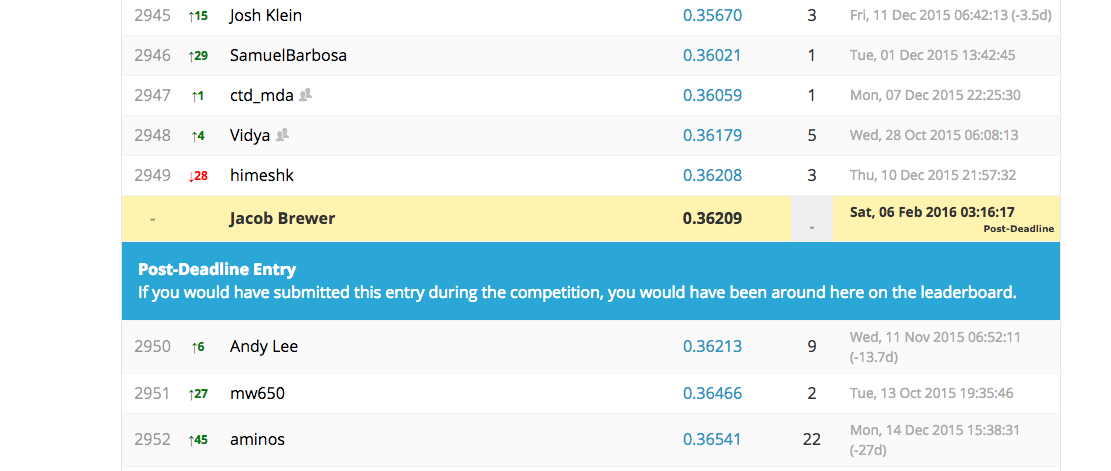

In [56]:
# these results are when I didn't shuffel the data and just took the first 100 data points
Image(filename='KaggleResults1.png') 

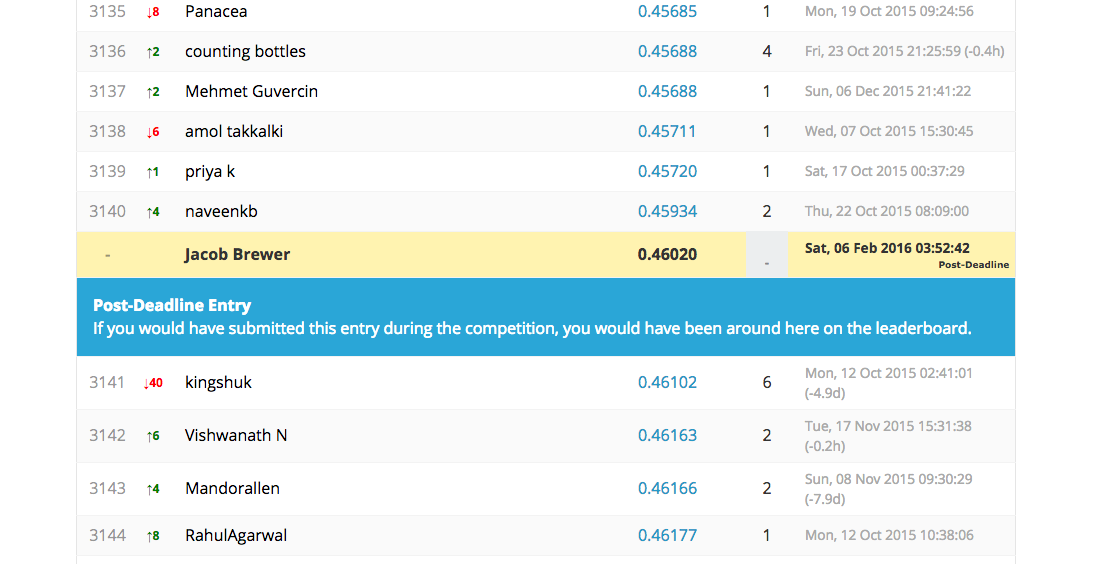

In [18]:
# these are the results when I did shuffel. Interestingly enough the unshuffeled data set performed better
Image(filename='KaggleResults2.png') 

In [3]:
import scipy.io
import numpy 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np

%matplotlib inline  

In [5]:
#Randomly Shuffel Data Set
df = pd.read_csv('store_train.csv', header=0)
randomData = df.reindex(np.random.permutation(df.index))
data = randomData[:1000]

In [6]:
#Select a subset of the data. Select m subset rows
m = 10
n = len(data)
randomListM = []
for i in range (0,m,1):
    nextRandomInt = random.randint(1, len(data))  # Integer from 1 to len(data), endpoints included
    randomListM.append(nextRandomInt)

In [7]:
testData = pd.read_csv('store_test.csv')
testData[:5]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0
2,3,7,4,2015-09-17,1,1,0,0
3,4,8,4,2015-09-17,1,1,0,0
4,5,9,4,2015-09-17,1,1,0,0


In [8]:
lengthOfTestData = testData.shape[0]
predictions = numpy.zeros(( n, 1 ))

In [9]:
#Kernel
MRow0 = data.iloc[0]
MRow1 = data.iloc[1]

def kernel(row1,row2):
    totalSimilarity = 0
    storeID1 = row1.Store
    storeID2 = row2.Store
    if storeID1 == storeID2:
        totalSimilarity += 1
        #print 'same Store'
    dayOfWeek1 = row1.DayOfWeek
    dayOfWeek2 = row2.DayOfWeek
    if dayOfWeek1 == dayOfWeek2:
        totalSimilarity += 1
        #print 'same dow'
    date1 = row1.Date
    date2 = row2.Date
    if date1 == date2:
        totalSimilarity += 1
        #print 'same date'
    open1 = row1.Open
    open2 = row2.Open
    if open1 == open2:
        totalSimilarity += 1
        #print 'same open status'
    promo1 = row1.Promo
    promo2 = row2.Promo
    if promo1 == promo2:
        totalSimilarity += 1
        #print 'same promo'
    stateHoliday1 = row1.StateHoliday
    stateHoliday2 = row2.StateHoliday
    if stateHoliday1 == stateHoliday2:
        totalSimilarity += 1
        #print 'same state holiday'
    schoolHoliday1 = row1.SchoolHoliday
    schoolHoliday2 = row2.SchoolHoliday
    if schoolHoliday1 == schoolHoliday2:
        totalSimilarity += 1
        #print 'same school holiday'
    #print totalSimilarity
    return totalSimilarity
    
kernel(MRow0, MRow1)

3

In [10]:
#First Create KMM KMN and KNM
#KMM 
KMM = np.zeros((m, m))

def generateKMM():
    for xi in range (0, m, 1): 
        for xj in range (0, m, 1):
            randomIndex1 = randomListM[xi]
            randomIndex2 = randomListM[xj]
            KMM[xi,xj] = kernel(data.iloc[randomIndex1], data.iloc[randomIndex2])
            
generateKMM()

KMN = np.zeros((m, n))

def generateKMN():
    for xi in range (0, m, 1):
        for xj in range (0, n, 1):
            mIndex = randomListM[xi]
            KMN[xi,xj] = kernel(data.iloc[mIndex], data.iloc[xj])
            
generateKMN()
KNM = np.transpose(KMN)
print KMN.shape
print KNM.shape

(10, 1000)
(1000, 10)


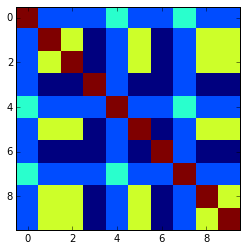

In [11]:
plt.imshow(KMM.reshape(m,m).T, interpolation='nearest',cmap='jet')

In [12]:
# we will test on this subset of the data
testingPoints = testData[:5]
testingPoints
testingPoints.iloc[0]

Id                        1
Store                     1
DayOfWeek                 4
Date             2015-09-17
Open                      1
Promo                     1
StateHoliday              0
SchoolHoliday             0
Name: 0, dtype: object

In [19]:
#Ktm is the 1×m kernel matrix between xt and every landmark xm

def generateKTM(testRow):
    KTM = np.zeros((1, m))
    for xj in range (0, m, 1):        
        mIndex = randomListM[xj]
        KTM[0,xj] = kernel(data.iloc[mIndex], testRow)
    return KTM  
        
        #KNM[xi,xj] = kernel(data.iloc[xi], data.iloc[mIndex])
            
KTM = generateKTM(testingPoints.iloc[0])
KTM

array([[ 3.,  2.,  2.,  2.,  3.,  2.,  4.,  4.,  2.,  2.]])

In [20]:
#Y
Y = data.Sales

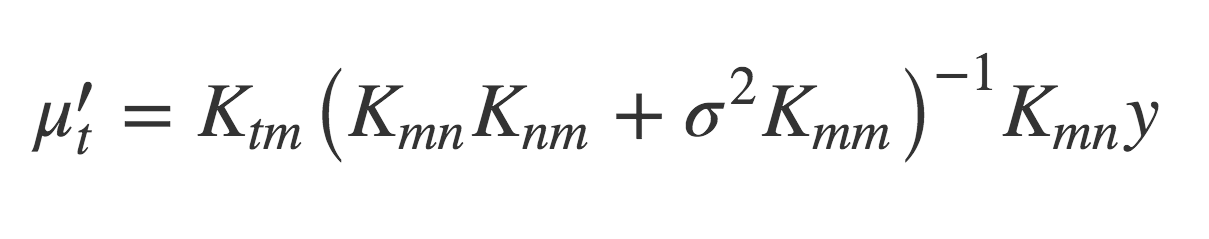

In [21]:
#Now let's put it all together into this equation
Image(filename='equation1.png')

In [22]:
singleTest = testingPoints.iloc[0]

#Generate KMN, KNM and KMM once and they will remain the same
sigma = 1
KmnKnm = KMN.dot(KNM)
KmnKnmPlusSigmaSqauaredKmm = KmnKnm + (sigma * KMM)
print KmnKnmPlusSigmaSqauaredKmm.shape
InverseKmnKnmPlusSigmaSqauaredKmm = np.linalg.inv(KmnKnmPlusSigmaSqauaredKmm)

def predictMuyPrime(testRow):
    KTM = generateKTM(testRow)
    KTMTimesInverse = KTM.dot(InverseKmnKnmPlusSigmaSqauaredKmm)
    KTMTimesInverseDotKmn = KTMTimesInverse.dot(KMN)
    muyPrime = KTMTimesInverseDotKmn.dot(Y)
    return muyPrime[0]
    #print 'muy prime: ', muyPrime[0]
    
print predictMuyPrime(singleTest)

(10, 10)
7133.82429833


In [23]:
# these are what we need to make predictions for 
testLength = testData.shape[0]
predictions = np.zeros(( testLength, 1 ))

#takes about 5 minutes to run...
for id in range( 0, testLength ):
    nextValForPrediction = testData.iloc[id]
    predictions[ id, 0 ] = predictMuyPrime(nextValForPrediction)

sfile = open('results.csv', 'wb' )
sfile.write( '"Id","Sales"\n' )
for id in range( 0, testLength ):
    sfile.write( '%d,%.2f\n' % ( id+1, predictions[id] ) )  # add one for one-based indexing
sfile.close()